In [404]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

temps_06 = ["prompt1", "prompt4", "prompt7", "prompt10", "prompt13", "prompt16"]
temps_08 = ["prompt2", "prompt5", "prompt8", "prompt11", "prompt14", "prompt17"]
temps_10 = ["prompt3", "prompt6", "prompt9", "prompt12", "prompt15", "prompt18"]

def read_and_preprocess_dataset(data_path, algorithm, language, prompt, efficient):
    df = pd.read_csv(data_path, header=None)
  
    # drop first row
    df = df.drop(df.index[0])
    # drop first column
    df = df.drop(df.columns[0], axis=1)
    df = df.transpose()
    
    # rename column '1' to 'Energy (mJ)'
    df = df.rename(columns={1: 'Energy (mJ)'})

    df['algorithm'] = algorithm
    df['language'] = language
    df['prompt'] = prompt
    df['efficient'] = efficient

    return df


def process_filename(filename):
    if 'human' in filename:
        algorithm = filename.split('_data_')[1].split('_')[0] + '_' + filename.split('_data_')[1].split('_')[1]
        language = filename.split('_data_')[1].split('_')[-1].strip(' .csv')
        prompt = 'NA'
        efficient = 'NA'
        return algorithm, language, prompt, efficient
    algorithm = filename.split('_data_')[0]
    language = filename.split('_data_')[1].split('_')[1]
    prompt = filename.split('_data_')[1].split('_')[2].strip(' .csv')
    efficient = True if 'efficient' in filename else False
    return algorithm, language, prompt, efficient


DATA_PATH = 'Run Joules/'
def create_df(df_type):
    data = pd.DataFrame()
    for folder in next(os.walk(DATA_PATH))[1]:
        if df_type == folder:
            folderpath = os.path.join(DATA_PATH, folder)
            for file in os.listdir(folderpath):
                filepath = os.path.join(folderpath, file)
                algorithm, language, prompt, efficient = process_filename(file)

                data = pd.concat([data, read_and_preprocess_dataset(filepath, algorithm, language, prompt, efficient)], ignore_index=True)
    return data


In [405]:
cn = create_df('CN Joules')
cn

,Energy (mJ),algorithm,language,prompt,efficient
0,225.644692867504,closest_numbers,Python,prompt1,False
1,227.391708852323,closest_numbers,Python,prompt1,False
2,221.886369157172,closest_numbers,Python,prompt1,False
3,216.011732614864,closest_numbers,Python,prompt1,False
4,220.56046649461,closest_numbers,Python,prompt1,False
...,...,...,...,...,...
534,5.83586794778593,closest_numbers,C++,prompt4,False
535,5.81969731709517,closest_numbers,C++,prompt4,False
536,5.96824241101361,closest_numbers,C++,prompt4,False
537,7.63770391845795,closest_numbers,C++,prompt4,False


In [406]:
sr = create_df('SR Joules')
sr

,Energy (mJ),algorithm,language,prompt,efficient
0,19.9394927964194,string_replacement,Python,prompt11,True
1,19.8829645751129,string_replacement,Python,prompt11,True
2,20.0799809389652,string_replacement,Python,prompt11,True
3,26.813726489357,string_replacement,Python,prompt11,True
4,19.7063368080798,string_replacement,Python,prompt11,True
...,...,...,...,...,...
535,12.2204264757815,string_replacement,JavaScript,prompt17,True
536,12.0043484963959,string_replacement,JavaScript,prompt17,True
537,12.8923873200171,string_replacement,JavaScript,prompt17,True
538,12.3757417828612,string_replacement,JavaScript,prompt17,True


In [407]:
ts = create_df('TS Joules')
ts

,Energy (mJ),algorithm,language,prompt,efficient
0,296.300113945561,two_sum,Python,prompt2,False
1,427.551270688646,two_sum,Python,prompt2,False
2,426.408862040209,two_sum,Python,prompt2,False
3,450.844507185336,two_sum,Python,prompt2,False
4,476.746947738344,two_sum,Python,prompt2,False
...,...,...,...,...,...
535,451.088409871269,two_sum,Python,prompt10,True
536,424.500864068557,two_sum,Python,prompt10,True
537,426.135747047355,two_sum,Python,prompt10,True
538,434.25893421913,two_sum,Python,prompt10,True


In [408]:
human = create_df('Human Joules')
human = human.drop(columns=['prompt', 'efficient'])
human

,Energy (mJ),algorithm,language
0,0.487828632658634,two_sum,C++
1,0.408600761182406,two_sum,C++
2,0.499093351565932,two_sum,C++
3,0.410074322102641,two_sum,C++
4,0.489889763551836,two_sum,C++
...,...,...,...
265,1.57122677752256,closest_numbers,JavaScript
266,1.71000603868756,closest_numbers,JavaScript
267,1.67933864550897,closest_numbers,JavaScript
268,1.56567878029288,closest_numbers,JavaScript


In [409]:
def change_temp(dataframe):
    df = dataframe.copy()
    for i, row in df.iterrows():
        if row['prompt'] in temps_06:
            df.at[i, 'prompt'] = 0.6
        elif row['prompt'] in temps_08:
            df.at[i, 'prompt'] = 0.8
        elif row['prompt'] in temps_10:
            df.at[i, 'prompt'] = 1.0

    # change the name of the column to temperature
    df = df.rename(columns={'prompt': 'temperature'})
    return df

cn = change_temp(cn)
sr = change_temp(sr)
ts = change_temp(ts)

In [410]:
def turn_data_column_to_float(df):
    df["Energy (mJ)"] = df["Energy (mJ)"].astype(float)
    return df

In [411]:
cn = turn_data_column_to_float(cn)
sr = turn_data_column_to_float(sr)
ts = turn_data_column_to_float(ts)
human = turn_data_column_to_float(human)

In [412]:
llama_cn_basic = cn[cn['efficient'] == False]
llama_cn_efficient = cn[cn['efficient'] == True]

llama_sr_basic = sr[sr['efficient'] == False]
llama_sr_efficient = sr[sr['efficient'] == True]

llama_ts_basic = ts[ts['efficient'] == False]
llama_ts_efficient = ts[ts['efficient'] == True]

In [413]:
llama_cn_basic_mean = llama_cn_basic.groupby(["algorithm", "language"]).mean().reset_index()
llama_cn_efficient_mean = llama_cn_efficient.groupby(["algorithm", "language"]).mean().reset_index()

# same for llama_ts
llama_ts_basic_mean = llama_ts_basic.groupby(["algorithm", "language"]).mean().reset_index()
llama_ts_efficient_mean = llama_ts_efficient.groupby(["algorithm", "language"]).mean().reset_index()

# same for llama_sr
llama_sr_basic_mean = llama_sr_basic.groupby(["algorithm", "language"]).mean().reset_index()
llama_sr_efficient_mean = llama_sr_efficient.groupby(["algorithm", "language"]).mean().reset_index()

In [414]:
human_mean = human.groupby(["algorithm", "language"]).mean().reset_index()
human_mean

,algorithm,language,Energy (mJ)
0,closest_numbers,C++,0.183320
1,closest_numbers,JavaScript,1.575687
2,closest_numbers,Python,0.419833
3,string_replacement,C++,8.043028
4,string_replacement,JavaScript,13.835285
5,string_replacement,Python,11.938103
6,two_sum,C++,0.445054
7,two_sum,JavaScript,1.528423
8,two_sum,Python,0.742066


In [415]:
human_cn = human_mean[human_mean['algorithm'] == 'closest_numbers']
human_sr = human_mean[human_mean['algorithm'] == 'string_replacement']
human_ts = human_mean[human_mean['algorithm'] == 'two_sum']

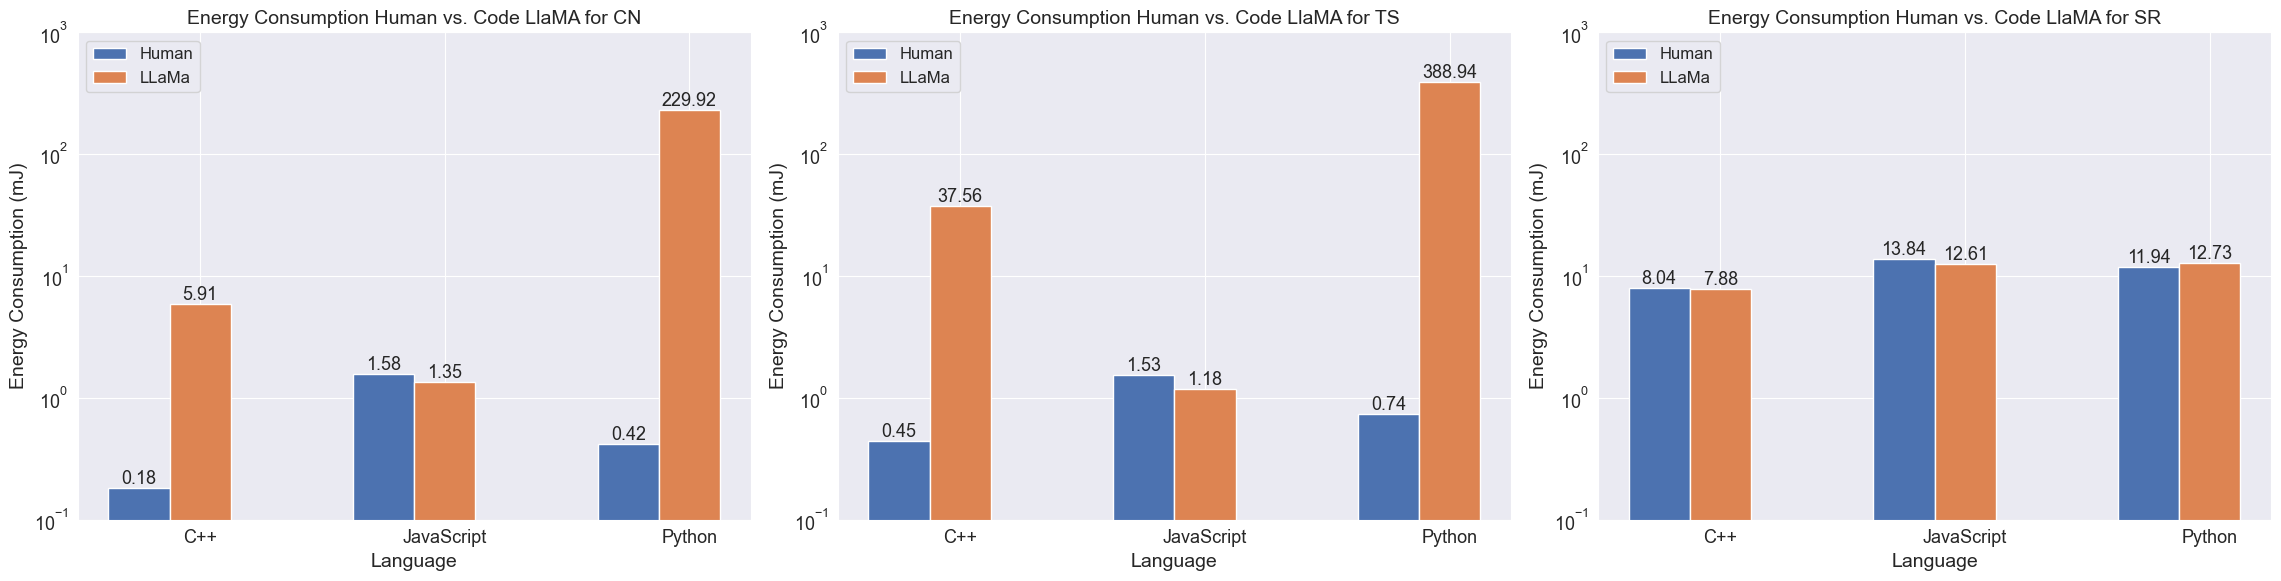

In [416]:
def plot_benchmarks(df, df1, label1, label2, title, subplot_position):
    sns.set_style("darkgrid")
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 13 
    sns.set_palette("deep")
    plt.subplot(1, 3, subplot_position)  
    barWidth = 0.25
    r1 = np.arange(len(df['language']))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, df['Energy (mJ)'], width=barWidth, label=label1)
    plt.bar(r2, df1['Energy (mJ)'], width=barWidth, label=label2)

    plt.xticks([r + barWidth for r in range(len(df['language']))], df['language'])
    plt.xlabel('Language', fontsize=14)
    plt.ylabel('Energy Consumption (mJ)', fontsize=14)
    plt.title(title, fontsize=14)
    plt.yscale('log')
    plt.ylim(0.1, 1000)  
    plt.legend(loc='upper left', fontsize=12)
    for i, v in enumerate(df['Energy (mJ)']):
        plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    for i, v in enumerate(df1['Energy (mJ)']):
        plt.text(i + 0.25, v, str(round(v, 2)), ha='center', va='bottom')
    plt.tight_layout()

plt.figure(figsize=(23, 6))  
plot_benchmarks(human_cn, llama_cn_basic_mean, 'Human', 'LLaMa', 'Energy Consumption Human vs. Code LlaMA for CN', 1)
plot_benchmarks(human_ts, llama_ts_basic_mean, 'Human', 'LLaMa', 'Energy Consumption Human vs. Code LlaMA for TS', 2)
plot_benchmarks(human_sr, llama_sr_basic_mean, 'Human', 'LLaMa', 'Energy Consumption Human vs. Code LlaMA for SR', 3)
plt.show()

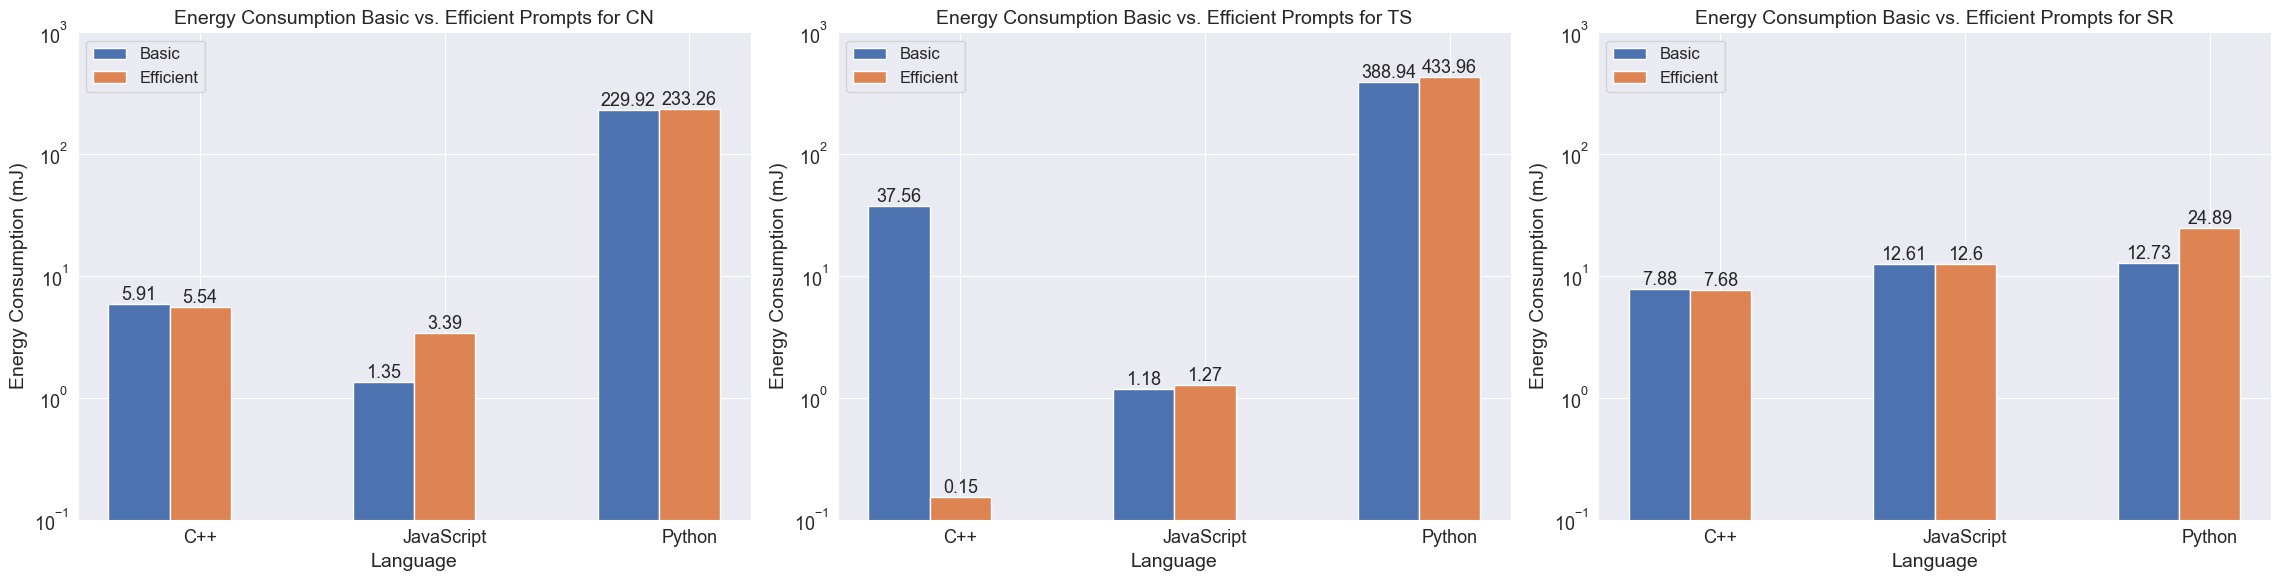

In [417]:
plt.figure(figsize=(23, 6))  
plot_benchmarks(llama_cn_basic_mean, llama_cn_efficient_mean, 'Basic', 'Efficient', 'Energy Consumption Basic vs. Efficient Prompts for CN', 1)
plot_benchmarks(llama_ts_basic_mean, llama_ts_efficient_mean, 'Basic', 'Efficient', 'Energy Consumption Basic vs. Efficient Prompts for TS', 2)
plot_benchmarks(llama_sr_basic_mean, llama_sr_efficient_mean, 'Basic', 'Efficient', 'Energy Consumption Basic vs. Efficient Prompts for SR', 3)
plt.show()

In [418]:
llama_cn_basic_mean_temp = llama_cn_basic.groupby(["algorithm", "language", "temperature"]).mean().reset_index()
llama_sr_basic_mean_temp = llama_sr_basic.groupby(["algorithm", "language", "temperature"]).mean().reset_index()
llama_ts_basic_mean_temp = llama_ts_basic.groupby(["algorithm", "language", "temperature"]).mean().reset_index()

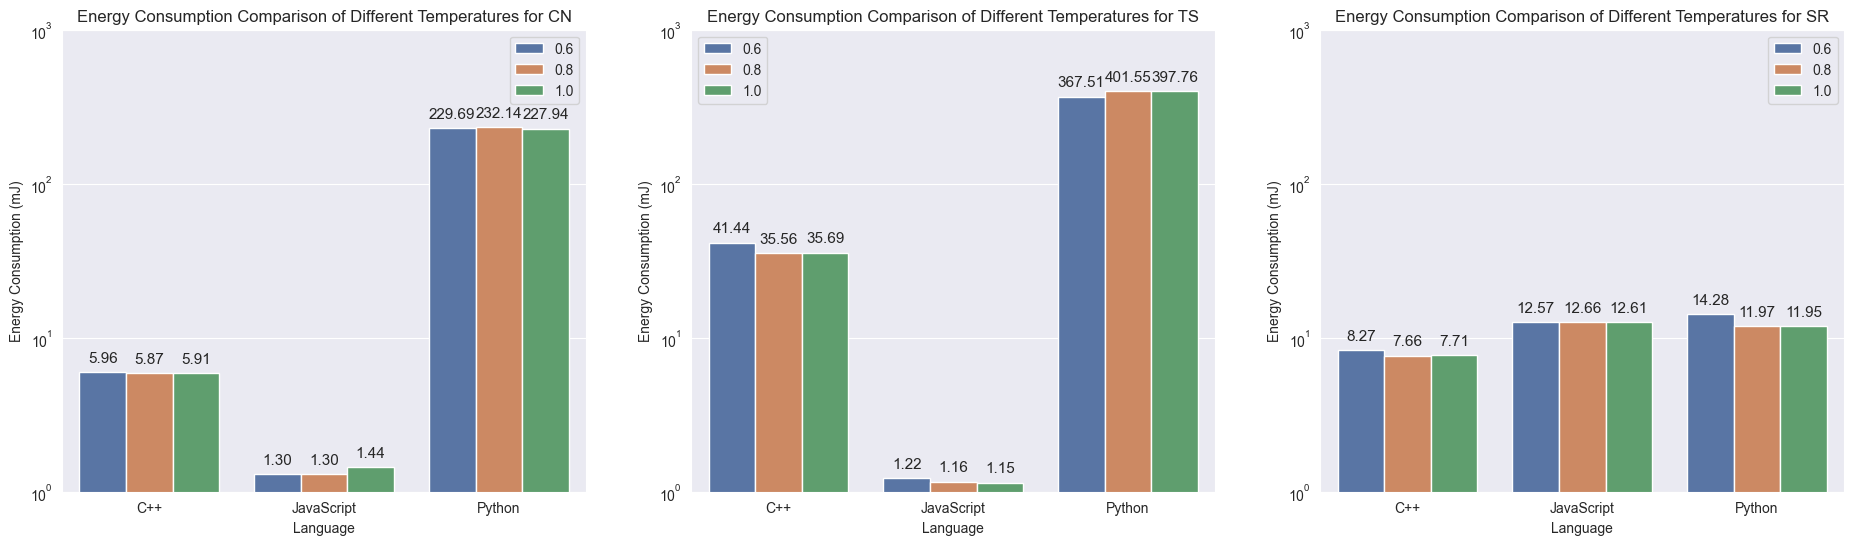

In [420]:
def plot_benchmarks_hue(df, title, ax):
    plt.rcParams['font.size'] = 10
    order = ['C++', 'JavaScript', 'Python']  
    sns.barplot(x='language', y='Energy (mJ)', hue='temperature', data=df, ax=ax, order=order, palette=sns.color_palette()[0:3])
    ax.set_xlabel('Language')
    ax.set_ylabel('Energy Consumption (mJ)')
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_ylim(1, 1000)  
    ax.legend() 

    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=11, xytext=(0, 10),
                           textcoords='offset points')

fig, axs = plt.subplots(1, 3, figsize=(23, 6))

plot_benchmarks_hue(llama_cn_basic_mean_temp, 'Energy Consumption Comparison of Different Temperatures for CN', axs[0])
plot_benchmarks_hue(llama_ts_basic_mean_temp, 'Energy Consumption Comparison of Different Temperatures for TS', axs[1])
plot_benchmarks_hue(llama_sr_basic_mean_temp, 'Energy Consumption Comparison of Different Temperatures for SR', axs[2])

plt.show()
